# Olympics data analysis

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the datasets

In [2]:
athletes = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Merge the 2 datasets into a single csv file

In [5]:
athletes_df = athletes.merge(regions, how='left', on= 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### Fixing columns name's

In [6]:
athletes_df.rename(columns={'region':'Region', 'notes':'Notes'},inplace=True)

### Checking null values

In [7]:
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

# Data visualization

In [9]:
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

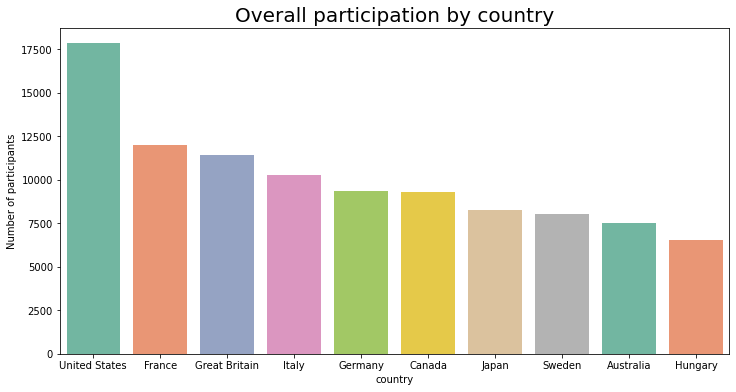

In [10]:
plt.figure(figsize=(12,6))
plt.title('Overall participation by country',size=20)
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='Set2')
plt.ylabel('Number of participants')
plt.xlabel('country')
plt.show()

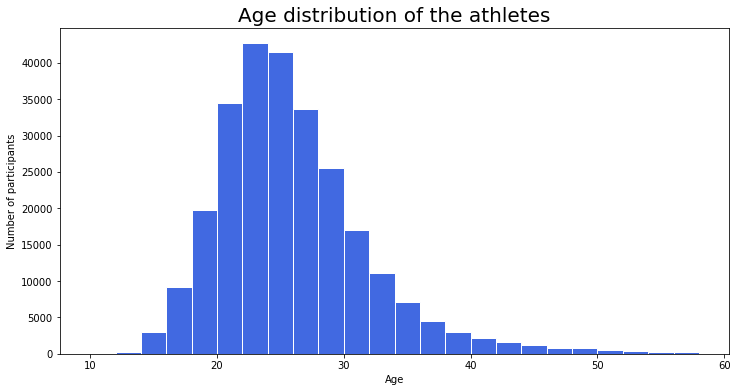

In [11]:
plt.figure(figsize=(12,6))
plt.title("Age distribution of the athletes",size=20)
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(athletes_df.Age, bins=np.arange(10,60,2), color='royalblue', edgecolor='white')
plt.show()

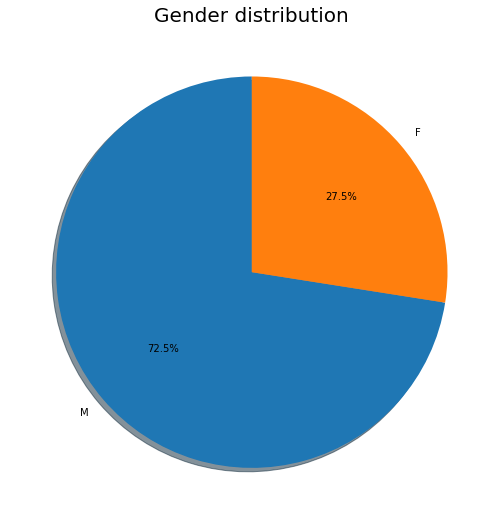

In [12]:
gender_counts = athletes_df.Sex.value_counts()
plt.figure(figsize=(18,9))
plt.title("Gender distribution",size=20)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.show()

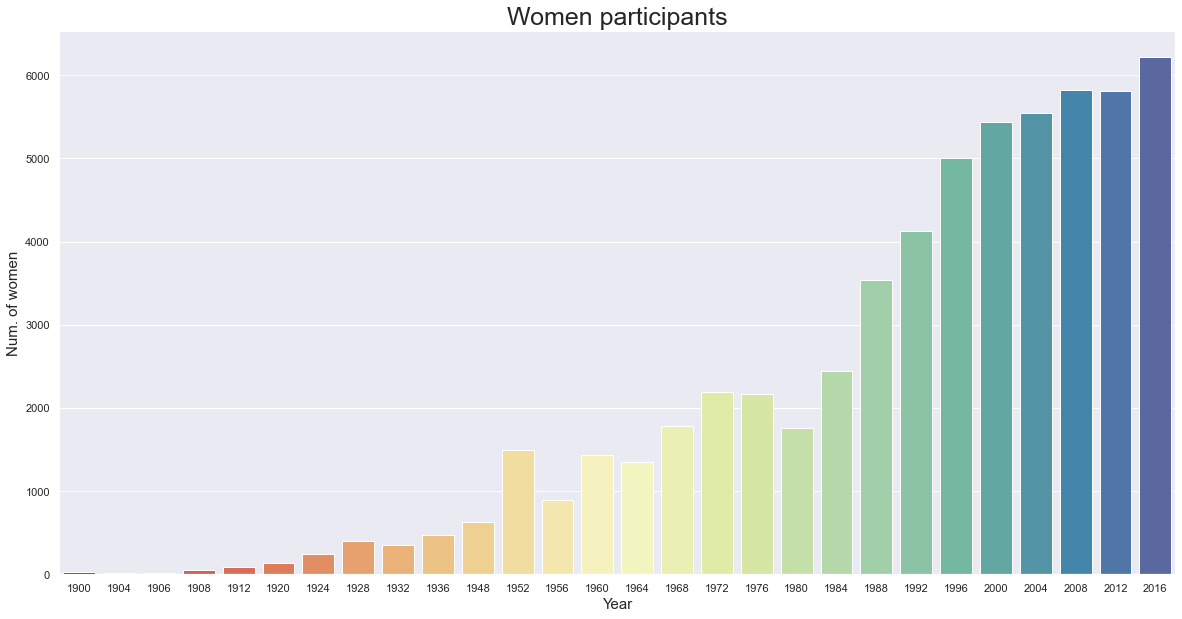

In [13]:
women_olympics = athletes_df[(athletes_df.Sex =='F') & (athletes_df.Season == 'Summer')]
sns.set (style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=women_olympics, palette="Spectral")
plt.ylabel('Num. of women', size=15)
plt.xlabel('Year', size=15)
plt.title("Women participants",size=25)
plt.show()

Text(0.5, 1.0, 'Female athletes over time')

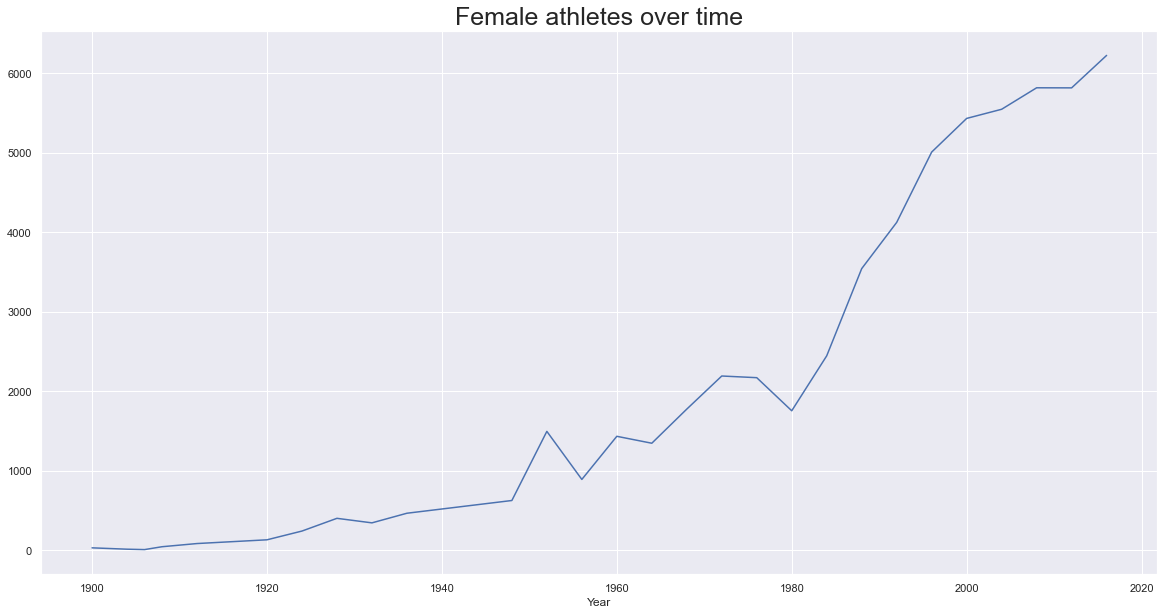

In [14]:
part= women_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title("Female athletes over time",size=25)

In [16]:
goldmedals = athletes[(athletes_df.Medal == 'Gold')]
goldmedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


In [37]:
totalgoldmedals = goldmedals.Team.value_counts().reset_index(name='Medal').head(5)
totalgoldmedals['index'][0] = 'USA'
totalgoldmedals

,index,Medal
0,USA,2472
1,Soviet Union,1058
2,Germany,676
3,Italy,534
4,Great Britain,515


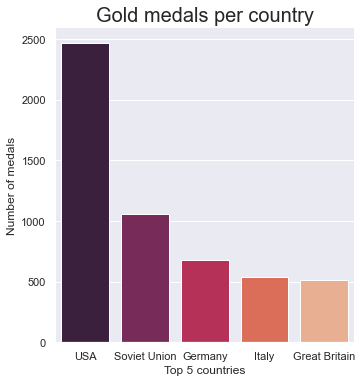

In [74]:
g = sns.catplot(x='index', y='Medal', data=totalgoldmedals, height=5, kind='bar', palette='rocket')
g.set_xlabels('Top 5 countries')
g.set_ylabels('Number of medals')
plt.title('Gold medals per country', fontsize=20)
plt.show()

In [50]:
max_year = athletes_df.Year.max()
team_names = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == 'Gold')].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

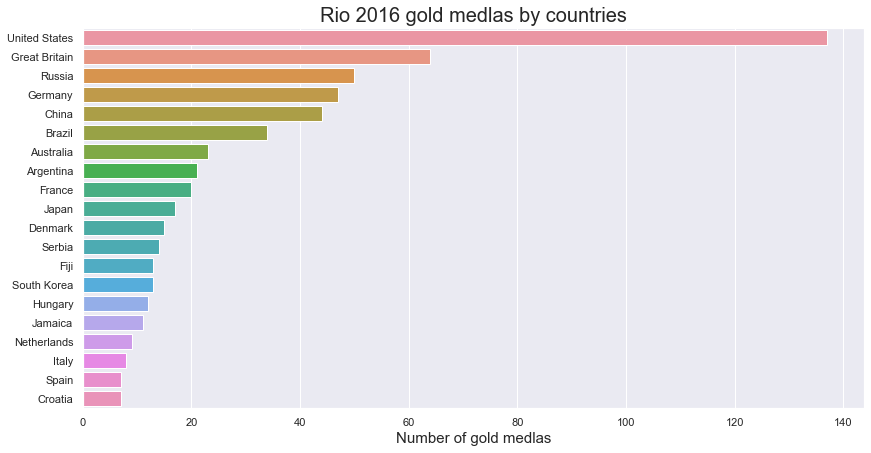

In [75]:
plt.figure(figsize=(14,7))
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.xlabel('Number of gold medlas', fontsize=15)
plt.title('Rio 2016 gold medlas by countries', fontsize=20)
plt.show()

In [68]:
not_null_medals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df['Weight'].notnull())]

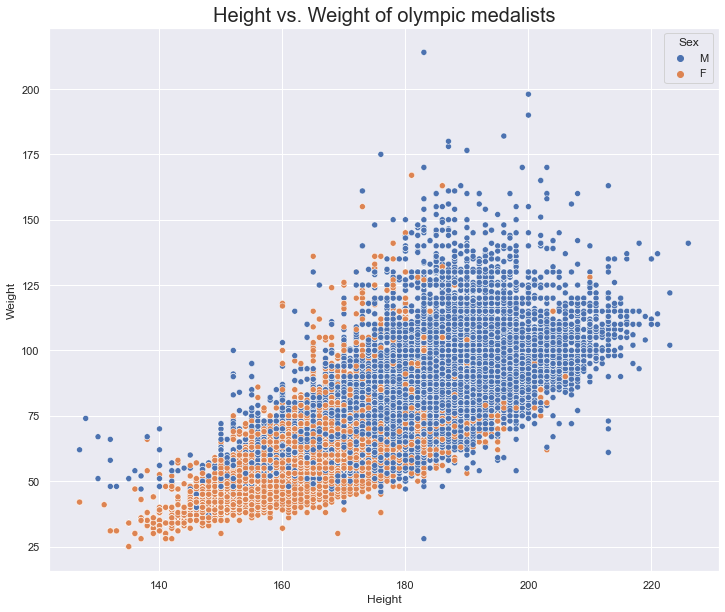

In [73]:
plt.figure(figsize=(12,10))
axis = sns.scatterplot(x='Height', y='Weight', data=not_null_medals, hue='Sex')
plt.title('Height vs. Weight of olympic medalists',fontsize=20)
plt.show()